# Wroclaw Public Transport

***

#### About the notebook
In this notebook, I will make some geographical analysis of the public transport in Wroclaw, Poland.

<br>

***

#### About the dataset
This GPS dataset is from [www.kaggle.com](https://www.kaggle.com). It was collected by the user [Piotr](https://www.kaggle.com/pieca111). It represents data from public transport vehicles in Wrocław, Poland in the period 2022-04-13 to 2022-04-30.

***

### (1) Import data from CSV

In [1]:
# IMPORTS
import pandas as pd

# LOAD CSV IN DATAFRAME
df = pd.read_csv("../data/positions.csv",
                 dtype='unicode',
                 names=["ID",
                        "Vehicle-ID",
                        "Line",
                        "Type",
                        "Latitude",
                        "Longitude",
                        "Timestamp",
                        ])

# DELETE FIRST ROW
df = df.iloc[1: , :]

### (2) Print dataframe to explore data

In [2]:
df.head(100)

,ID,Vehicle-ID,Line,Type,Latitude,Longitude,Timestamp
1,1,19707402,33,tram,51.113544,17.067019,2022-04-13T11:34:46.810755
2,2,19707424,33,tram,51.11554,17.074562,2022-04-13T11:34:46.810755
3,3,19679615,31,tram,51.112755,17.012657,2022-04-13T11:34:46.810755
4,4,19679761,31,tram,51.112915,17.01011,2022-04-13T11:34:46.810755
5,5,19679724,31,tram,51.12958,16.982096,2022-04-13T11:34:46.810755
...,...,...,...,...,...,...,...
96,96,19767216,d,bus,51.15687,17.121798,2022-04-13T11:34:46.810755
97,97,19767441,k,bus,7158.279,7158.279,2022-04-13T11:34:46.810755
98,98,19708471,70,tram,51.121685,17.043598,2022-04-13T11:34:46.810755
99,99,19764541,131,bus,51.14542,17.108097,2022-04-13T11:34:46.810755


### (3) Prepare data

#### Split and convert 'Timestamp' into 'Date' and 'Time'

In [3]:
# SPLIT 'TIMESTAMP' COLUMN
df[['Date', 'Time']] = df['Timestamp'].str.split('T', 1, expand=True)

In [4]:
# CONVERT 'DATE' COLUMN
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [5]:
# CONVERT 'TIME' COLUMN
df['Time'] = pd.to_datetime(df.Time, format ='%H:%M:%S.%f', errors = 'coerce').dt.time # TIME IS STILL AN OBJECT

In [6]:
# REMOVE CHARACTER IN 'TIMESTAMP' COLUMN
df['Timestamp'] = df["Timestamp"].str.replace("T"," ")

In [7]:
# CONVERT 'TIMESTAMP' COLUMN
df['Timestamp'] = pd.to_datetime(df.Timestamp, format='%Y-%m-%d %H:%M:%S.%f')

In [8]:
# PRINT DTYPES OF DATAFRAME
df.dtypes

ID                    object
Vehicle-ID            object
Line                  object
Type                  object
Latitude              object
Longitude             object
Timestamp     datetime64[ns]
Date          datetime64[ns]
Time                  object
dtype: object

#### Convert Geo-Positions (Latitude, Longitude)


In [9]:
# CONVERT LATITUDE
df = df.astype({'Latitude':'float'})
# CONVERT LONGITUDE
df = df.astype({'Longitude':'float'})

#### Remove Outliers (Latitude, Longitude)

In [10]:
# SORT DATAFRAME DESCENDING
df.sort_values('Latitude', ascending=False)

,ID,Vehicle-ID,Line,Type,Latitude,Longitude,Timestamp,Date,Time
16528211,16528211,19775089,d,bus,7158.279,7158.279,2022-04-24 13:37:38.445930,2022-04-24,13:37:38.445930
25017226,25017226,19741475,2,tram,7158.279,7158.279,2022-04-29 17:59:42.887675,2022-04-29,17:59:42.887675
6428254,6428254,19760948,104,bus,7158.279,7158.279,2022-04-18 06:04:31.770293,2022-04-18,06:04:31.770293
15171417,15171417,19802765,1,tram,7158.279,7158.279,2022-04-23 12:18:04.384013,2022-04-23,12:18:04.384013
20355628,20355628,19819176,c,bus,7158.279,7158.279,2022-04-27 04:24:33.489169,2022-04-27,04:24:33.489169
...,...,...,...,...,...,...,...,...,...
7617396,7617396,19766067,602,bus,0.000,0.000,2022-04-19 06:49:36.167243,2022-04-19,06:49:36.167243
18566877,18566877,19741105,33,tram,0.000,0.000,2022-04-25 17:24:42.447676,2022-04-25,17:24:42.447676
17373534,17373534,19741092,33,tram,0.000,0.000,2022-04-25 05:16:12.900279,2022-04-25,05:16:12.900279
7415555,7415555,19766066,602,bus,0.000,0.000,2022-04-19 04:48:07.079381,2022-04-19,04:48:07.079381


In [11]:
# DROP OUTLIERS IN LATITUDE
df.drop(index=df[df['Latitude'] >= 60].index, inplace=True)
# DROP OUTLIERS IN LONGITUDE
df.drop(index=df[df['Longitude'] >= 60].index, inplace=True)

#### Print prepared dataframe

In [12]:
# PRINT DATAFRAME
df.head(100)

,ID,Vehicle-ID,Line,Type,Latitude,Longitude,Timestamp,Date,Time
1,1,19707402,33,tram,51.113544,17.067019,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
2,2,19707424,33,tram,51.115540,17.074562,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
3,3,19679615,31,tram,51.112755,17.012657,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
4,4,19679761,31,tram,51.112915,17.010110,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
5,5,19679724,31,tram,51.129580,16.982096,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
...,...,...,...,...,...,...,...,...,...
96,96,19767216,d,bus,51.156870,17.121798,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
98,98,19708471,70,tram,51.121685,17.043598,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
99,99,19764541,131,bus,51.145420,17.108097,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
100,100,19765270,144,bus,51.105946,17.023780,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755


### (4) Visualise data

#### Create new dataframe at specific date

In [13]:
# CREATE NEW DATAFRAME
time_df = pd.DataFrame()

# WRITE DATA AT SPECIFIC DATE IN NEW DATAFRAME
time_df = df[df['Date'] == '2022-04-25'] # HERE YOU CAN DATE

In [14]:
# COUNT ALL ROWS IN DATAFRAME
len(time_df.index)

1641518

In [15]:
# COUNT ENTRIES IN 'TYPE' COLUMN
time_df['Type'].value_counts()

bus     1043371
tram     598147
Name: Type, dtype: int64

#### Create new dataframe for 'Type' and counts entries

In [16]:
# CREATE NEW DATAFRAME
type_df = pd.DataFrame()

# WRITE DATA IN NEW DATAFRAME GROUPED BY 'Type' AND 'Timestamp'
type_df = time_df.groupby(['Type', 'Timestamp']).size().to_frame('Count')
type_df

Count
Type Timestamp                        
bus  2022-04-25 00:00:09.766160     36
     2022-04-25 00:00:25.082715     37
     2022-04-25 00:00:40.596822     36
     2022-04-25 00:00:55.344544     36
     2022-04-25 00:01:10.111151     36
...                                ...
tram 2022-04-25 21:13:13.105450     28
     2022-04-25 21:13:28.112590     26
     2022-04-25 21:13:43.093792     15
     2022-04-25 21:13:58.094528      9
     2022-04-25 21:14:13.104989      2

[10370 rows x 1 columns]

<AxesSubplot:xlabel='Timestamp', ylabel='Count'>

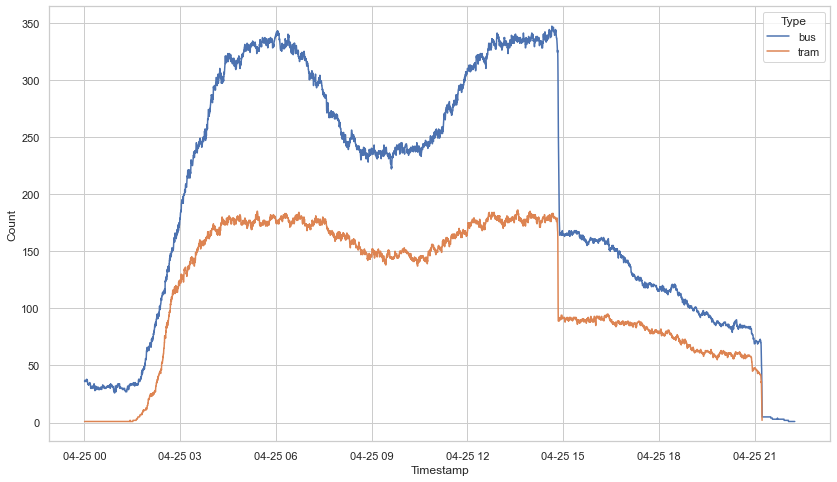

In [18]:
# IMPORTS
import seaborn as sns
import matplotlib.pyplot as plt

# SET THEME
sns.set_theme(style="whitegrid")

# SET SIZE OF PLOT
fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)

# LINEPLOT
sns.lineplot(x="Timestamp", y="Count", hue="Type", data=type_df)